In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
#matplotlib.rcParams.update({'font.size': 30})

from pylab import polyfit
from scipy.stats import linregress

In [4]:
from fase.fileio import Table

In [5]:
def median_in_bins_err(x,y,x1,x2,nbins,p1=0.25,p2=0.75):
    medians_x = np.zeros(nbins)
    medians_y = np.zeros(nbins)
    err_y_low = np.zeros(nbins)
    err_y_high = np.zeros(nbins)
    array = np.array(x)
    array = np.array(y)
    width = (float(x2)-float(x1))/nbins
    for i in range(int(nbins)):
        x_low = x1 + i*width
        x_high = x1+ (i+1)*width
        #print x_low, x_high
        sel = np.where((x>x_low)&(x<x_high))
        temp_ord = np.copy(y[sel])
        temp_ord = np.sort(temp_ord)
        medians_y[i] = temp_ord[int(len(temp_ord)*0.50 + 0.5)]
        err_y_low[i]  = np.abs(temp_ord[int(len(temp_ord)*p1 + 0.5)]-medians_y[i])
        err_y_high[i]  = np.abs(temp_ord[int(len(temp_ord)*p2 + 0.5)]-medians_y[i])
        #err_y[i] = [err_y_low,err_y_high]
        medians_x[i] = np.median(x[sel])
    return np.array(medians_x),np.array(medians_y),err_y_low,err_y_high

In [6]:
em = Table('../data/EmLinesPhys_150617.fits')

In [7]:
em.getColNames()

array(['SPECID', 'SURVEY', 'IS_SBEST', 'IS_BEST', 'SKYABS_FLAG',
       'EMLINE_METHOD', 'EMLINE_CLASS', 'CATAID', 'RA', 'DEC', 'Z',
       'Z_TONRY', 'ZMAX_19P8', 'NQ', 'PETRORAD_R', 'ABSMAG_G', 'ABSMAG_R',
       'SN', 'NIIR_HA', 'OIIIR_HB', 'F_HALPHA', 'F_HBETA',
       'BALMER_DECREMENT', 'BALMER_DECREMENT_FLAG', 'L_APCOR',
       'L_APOBSCOR', 'L_APOBSCOR_EMP', 'SFR', 'ANGULAR_DIAM_DIST',
       'PHYS_TRANSV_DIST', 'SIGMA_SFR'], dtype='|S21')

In [8]:
niiha_ = em.getCol('NIIR_HA')

In [9]:
len(niiha_)

427829

In [10]:
oiiihb_ = em.getCol('OIIIR_HB')

In [11]:
z_ = em.getCol('Z')

In [12]:
SN_ = em.getCol('SN')
SFR_ = em.getCol('SFR')
RA_ = em.getCol('RA')
DEC_ = em.getCol('DEC')

In [13]:
F_Ha = em.getCol('F_HALPHA')
F_Hb = em.getCol('F_HBETA')

In [14]:
D_A = em.getCol('ANGULAR_DIAM_DIST') 

In [13]:
print(len(niiha))
print(len(oiiihb))

427829
427829


In [23]:
sel = np.where((niiha_>-20)&(oiiihb_>-30))
niiha = niiha_[sel]
oiiihb = oiiihb_[sel]
sfr = SFR_[sel]
z=z_[sel]

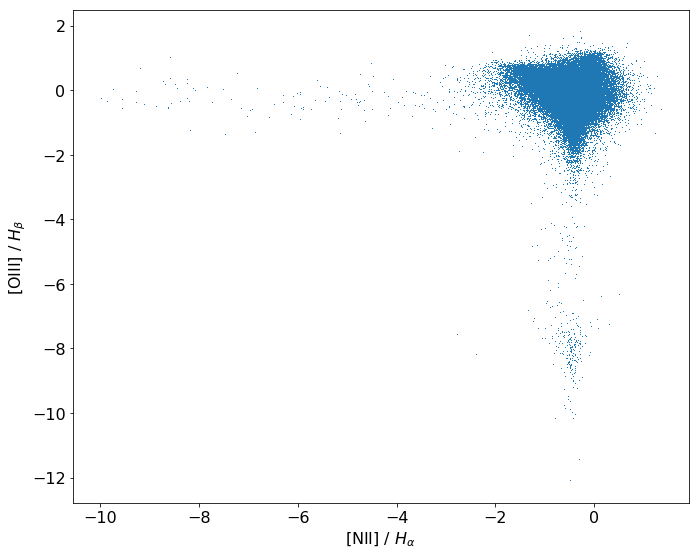

In [25]:
plt.figure(figsize=(10,8))
plt.plot(niiha,oiiihb,',')
plt.xlabel(r'[NII] / $H_{\alpha}$')
plt.ylabel(r'[OIII] / $H_{\beta}$')
plt.tight_layout()
#plt.savefig('../plots/20/BPT_goodpoints.png')
plt.show()

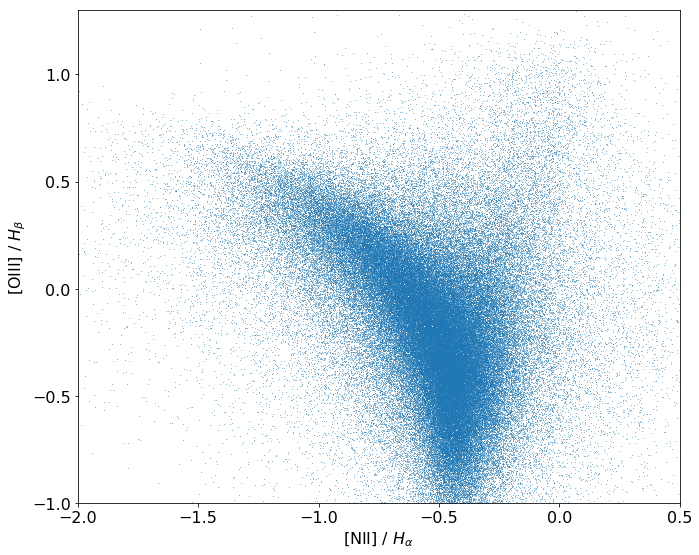

In [26]:
plt.figure(figsize=(10,8))
plt.plot(niiha,oiiihb,',',alpha=0.5)
plt.xlabel(r'[NII] / $H_{\alpha}$')
plt.ylabel(r'[OIII] / $H_{\beta}$')
plt.xlim(-2,0.5)
plt.ylim(-1,1.3)
plt.tight_layout()
#plt.savefig('../plots/20/BPT_zoom_madusha.png')
plt.show()

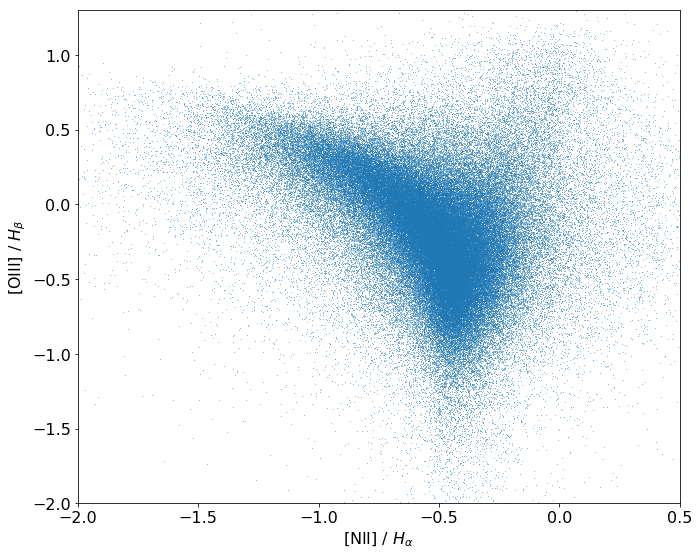

In [27]:
plt.figure(figsize=(10,8))
plt.plot(niiha,oiiihb,',',alpha=0.5)
plt.xlabel(r'[NII] / $H_{\alpha}$')
plt.ylabel(r'[OIII] / $H_{\beta}$')
plt.xlim(-2,0.5)
plt.ylim(-2,1.3)
plt.tight_layout()
#plt.savefig('../plots/20/BPT_zoom_casual.png')
plt.show()

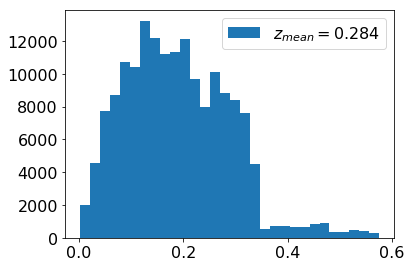

z mean =  0.1887722


In [28]:
plt.hist(z,bins=30,label=r'$z_{mean} = 0.284$')
plt.legend()
plt.tight_layout()
#plt.savefig('../plots/20/z_histo.png')
plt.show()
print 'z mean = ',z.mean()

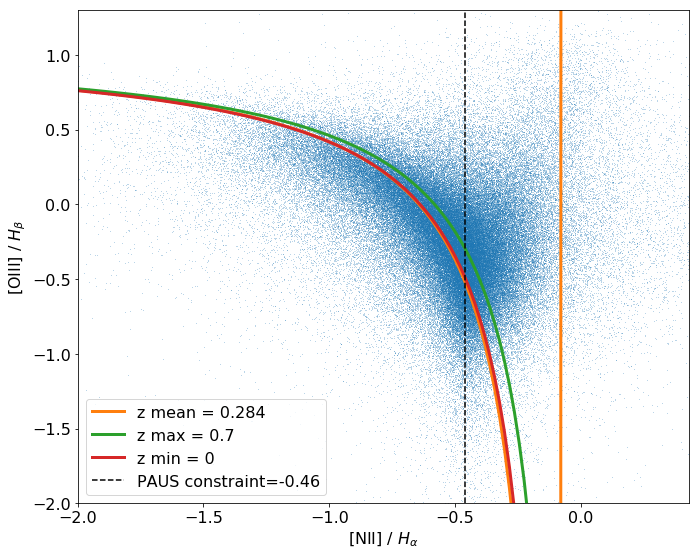

In [29]:
x1 = -2
x2 = 0.5

zmean = z.mean()

if x2>=-0.069:
    x2=-0.069 

x = np.linspace(x1,x2,100)
x_ = np.linspace(x1,-0.1,100)

#y = (0.61/(x + 0.069))+1.08 #z=0.284
y = (0.61/(x + 0.138 - 0.042*(1+zmean)**2))+1.08
ymax  = (0.61/(x + 0.138 - 0.042*(1+0.7)**2))+1.08
ymin  = (0.61/(x_ + 0.138 - 0.042*(1+0.)**2))+1.08

plt.figure(figsize=(10,8))
#plt.axvline(-0.069,ls='dashed',lw=10)
plt.plot(niiha,oiiihb,',',alpha=0.3)
plt.plot(x,y,lw=3,label='z mean = 0.284')
plt.plot(x,ymax,lw=3,label='z max = 0.7')
plt.plot(x,ymin,lw=3,label = 'z min = 0')

plt.axvline(-0.46,c='k',ls='dashed',label='PAUS constraint=-0.46')

plt.xlabel(r'[NII] / $H_{\alpha}$')
plt.ylabel(r'[OIII] / $H_{\beta}$')
plt.xlim(x1,x2+0.5)
plt.ylim(-2,1.3)
plt.legend()
plt.tight_layout()
#plt.savefig('../plots/20/BPT_fit_plus.png')
plt.show()

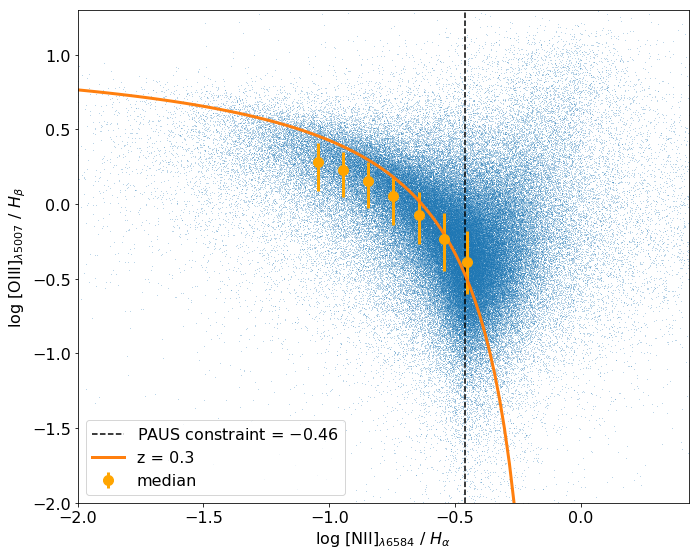

In [30]:
x1 = -2
x2 = 0.5

#zmean = z.mean()
zmean = 0.3

if x2>=-0.069:
    x2=-0.069 

x = np.linspace(x1,x2,100)
x_ = np.linspace(x1,-0.1,100)

#y = (0.61/(x + 0.069))+1.08 #z=0.284
y = (0.61/(x + 0.138 - 0.042*(1+zmean)**2))+1.08
ymax  = (0.61/(x + 0.138 - 0.042*(1+0.7)**2))+1.08
ymin  = (0.61/(x_ + 0.138 - 0.042*(1+0.)**2))+1.08

plt.figure(figsize=(10,8))


##############

selection = np.where((niiha>-3)&(oiiihb>-3))
xx,yy,ey1,ey2 = median_in_bins_err(niiha[selection],oiiihb[selection],-1.1,-0.4,7)
#plt.plot(yy,xx)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=20,elinewidth=3,color='orange',label ='median')








##############


#plt.axvline(-0.069,ls='dashed',lw=10)
plt.plot(niiha[selection],oiiihb[selection],',',alpha=0.3,zorder=-1)
plt.axvline(-0.46,c='k',ls='dashed',label=r'PAUS constraint = $-0.46$')
plt.plot(x,y,lw=3,label='z = 0.3')

#plt.plot(x,ymax,lw=3,label='z max = 0.7')
#plt.plot(x,ymin,lw=3,label = 'z min = 0')

plt.xlabel(r'log [NII]$_{\lambda6584}$ / $H_{\alpha}$')
plt.ylabel(r'log [OIII]$_{\lambda5007}$ / $H_{\beta}$')
plt.xlim(x1,x2+0.5)
plt.ylim(-2,1.3)
#plt.title('GAMA sample')
plt.legend()
plt.tight_layout()
#plt.savefig('../plots/20/NII_BPT_faisst.png')
plt.show()

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in log10


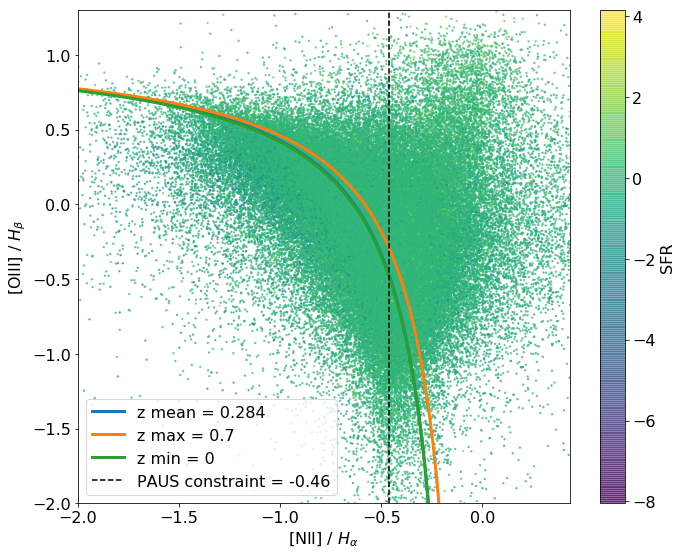

In [297]:
x1 = -2
x2 = 0.5

zmean = z.mean()

if x2>=-0.069:
    x2=-0.069 

x = np.linspace(x1,x2,100)
x_ = np.linspace(x1,-0.1,100)

#y = (0.61/(x + 0.069))+1.08 #z=0.284
y = (0.61/(x + 0.138 - 0.042*(1+zmean)**2))+1.08
ymax  = (0.61/(x + 0.138 - 0.042*(1+0.7)**2))+1.08
ymin  = (0.61/(x_ + 0.138 - 0.042*(1+0.)**2))+1.08

plt.figure(figsize=(10,8))
#plt.axvline(-0.069,ls='dashed',lw=10)
plt.scatter(niiha,oiiihb,c=np.nan_to_num(np.log10(sfr)),alpha=0.6,s=2)
plt.plot(x,y,lw=3,label='z mean = 0.284')
plt.plot(x,ymax,lw=3,label='z max = 0.7')
plt.plot(x,ymin,lw=3,label = 'z min = 0')

plt.axvline(-0.46,c='k',ls='dashed',label='PAUS constraint = -0.46')

plt.xlabel(r'[NII] / $H_{\alpha}$')
plt.ylabel(r'[OIII] / $H_{\beta}$')
plt.xlim(x1,x2+0.5)
plt.ylim(-2,1.3)
plt.legend()
plt.colorbar(label='SFR')
plt.tight_layout()
plt.savefig('../plots/20/BPT_fit_colour.png')
plt.show()

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


(array([6.70000e+01, 9.20000e+01, 9.70000e+01, 1.56000e+02, 2.31000e+02,
        3.19000e+02, 4.20000e+02, 5.66000e+02, 6.85000e+02, 1.00700e+03,
        1.34300e+03, 1.50200e+03, 1.66500e+03, 1.84100e+03, 2.08100e+03,
        1.40082e+05, 2.27000e+03, 2.20200e+03, 2.24600e+03, 2.11200e+03,
        1.90900e+03, 1.56700e+03, 1.16300e+03, 9.04000e+02, 5.60000e+02,
        3.62000e+02, 2.25000e+02, 1.52000e+02, 7.00000e+01, 3.90000e+01]),
 array([-2.        , -1.86666667, -1.73333333, -1.6       , -1.46666667,
        -1.33333333, -1.2       , -1.06666667, -0.93333333, -0.8       ,
        -0.66666667, -0.53333333, -0.4       , -0.26666667, -0.13333333,
         0.        ,  0.13333333,  0.26666667,  0.4       ,  0.53333333,
         0.66666667,  0.8       ,  0.93333333,  1.06666667,  1.2       ,
         1.33333333,  1.46666667,  1.6       ,  1.73333333,  1.86666667,
         2.        ]),
 <a list of 30 Patch objects>)

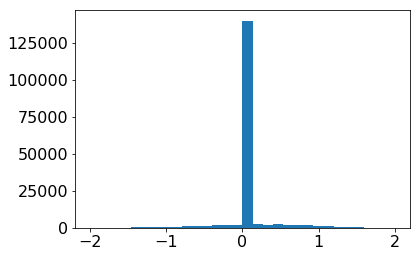

In [103]:
plt.hist(np.nan_to_num(np.log10(sfr)),bins=30,range=(-2,2))

In [97]:
np.log10(sfr)

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


array([       nan,        nan,        nan, ..., 1.15641527,        nan,
              nan])

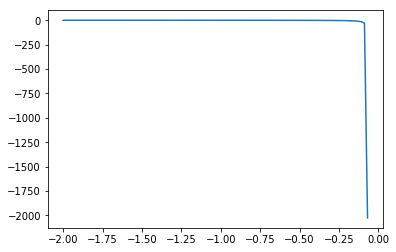

In [15]:
plt.plot(x,y)

In [16]:
em.getColNames()

array(['SPECID', 'SURVEY', 'IS_SBEST', 'IS_BEST', 'SKYABS_FLAG',
       'EMLINE_METHOD', 'EMLINE_CLASS', 'CATAID', 'RA', 'DEC', 'Z',
       'Z_TONRY', 'ZMAX_19P8', 'NQ', 'PETRORAD_R', 'ABSMAG_G', 'ABSMAG_R',
       'SN', 'NIIR_HA', 'OIIIR_HB', 'F_HALPHA', 'F_HBETA',
       'BALMER_DECREMENT', 'BALMER_DECREMENT_FLAG', 'L_APCOR',
       'L_APOBSCOR', 'L_APOBSCOR_EMP', 'SFR', 'ANGULAR_DIAM_DIST',
       'PHYS_TRANSV_DIST', 'SIGMA_SFR'], dtype='|S21')

# Checks

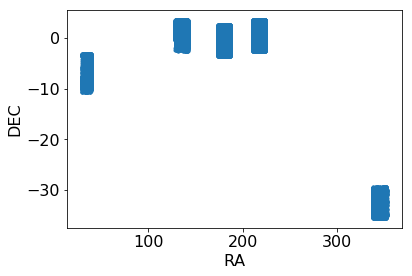

In [75]:
plt.plot(RA,DEC,'.')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.show()

In [25]:
print(len(RA))
print(len(DEC))

427829
427829


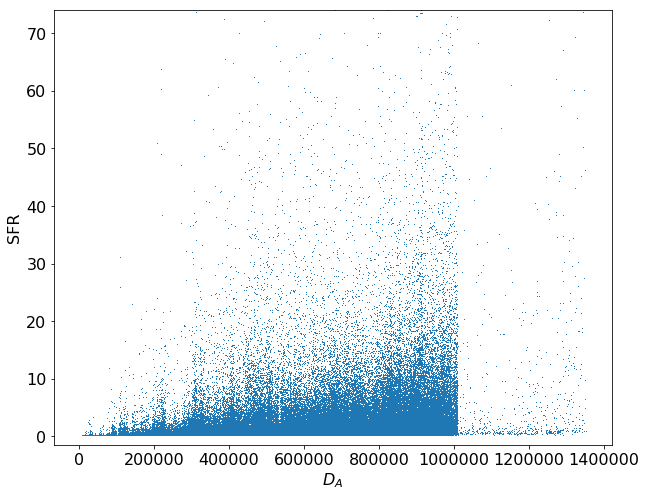

In [74]:
plt.figure(figsize=(10,8))
plt.plot(D_A,SFR,",")
plt.xlabel(r'$D_A$')
plt.ylabel('SFR')
plt.ylim(-1.5,74.)
plt.show()

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


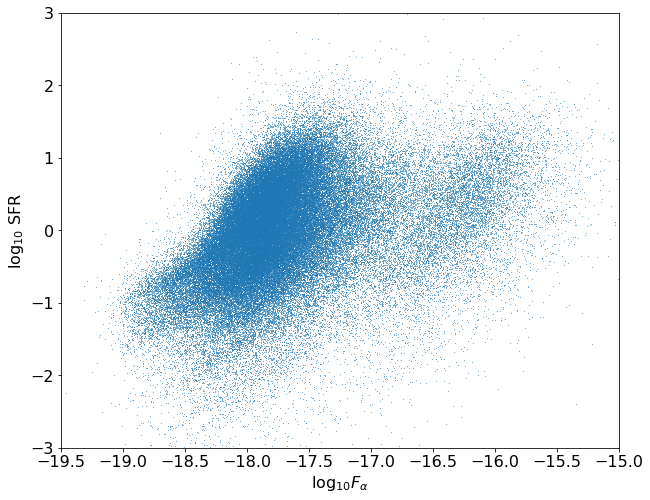

In [86]:
plt.figure(figsize=(10,8))
plt.plot(np.log10(F_Ha),np.log10(SFR),",",alpha=0.6)
plt.ylim(-3,3)
plt.xlim(-19.5,-15)
plt.xlabel(r'$\log_{10} F_{\alpha}$')
plt.ylabel(r'$\log_{10} $ SFR')
plt.savefig('../plots/20/H_alpha_SFR.png')
plt.show()

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


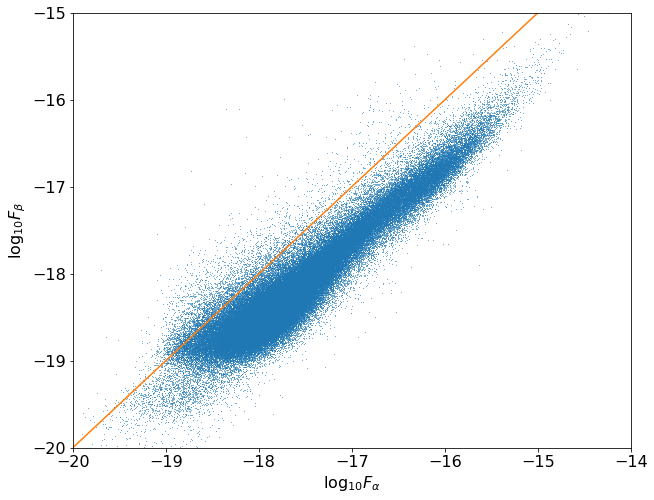

In [87]:
plt.figure(figsize=(10,8))
plt.plot(np.log10(F_Ha),np.log10(F_Hb),",",alpha=0.6)
plt.xlabel(r'$\log_{10} F_{\alpha}$')
plt.ylabel(r'$\log_{10} F_{\beta}$')
plt.xlim(-20,-14)
plt.ylim(-20,-15)
plt.plot(np.linspace(-20,-14),np.linspace(-20,-14))
plt.savefig('../plots/20/H_alpha_H_beta.png')
plt.show()

# Kewley 2001

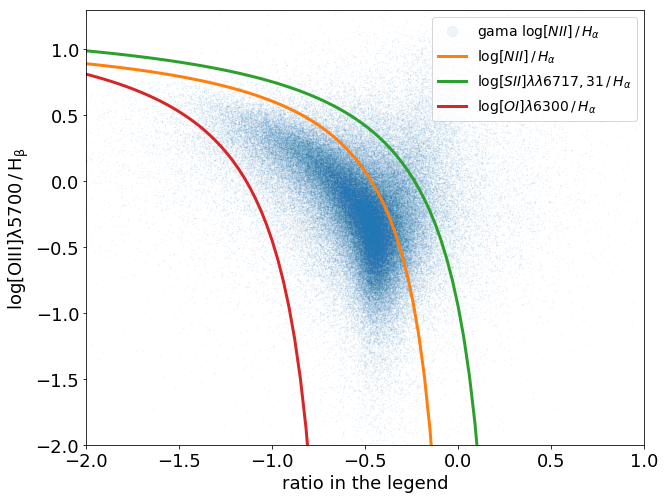

In [27]:
matplotlib.rcParams.update({'font.size': 18})

plt.figure(figsize=(10,8))
plt.ylim(-2,1.3)
plt.xlim(-2.,1.)

x = np.linspace(-2,1,100)
#equations 5,6,7 of Kewley et al. 2001a (pag 137)
y_1 = 0.61/(x - 0.047)+1.19 # x = log([NII]/Ha)
y_2 = 0.72/(x - 0.32)+1.30 # x = log([SII]6717,31/Ha)
y_3 = 0.73/(x + 0.59)+1.33 # x = log([OI]6300/Ha)
       
#y_4 = 0.61/(x - 0.05)+1.3 # x = log([NII]/Ha)
    
plt.plot(niiha,oiiihb,'.',markersize=1,alpha=0.07,label=r'gama $\log [NII] \, / \, H_{\alpha}$ ')
    
plt.plot(x[x<0.047],y_1[x<0.047],lw=3,label=r'$\log [NII] \, / \, H_{\alpha}$')
plt.plot(x[x<0.32],y_2[x<0.32],lw=3,label=r'$\log [SII]\lambda\lambda 6717,31 \, / \, H_{\alpha}$')
plt.plot(x[x<-0.59],y_3[x<-0.59],lw=3,label=r'$\log [OI]\lambda 6300 \, / \, H_{\alpha}$')
#plt.plot(x[x<0.05],y_4[x<0.05],lw=3,label=r'$\log [NII] \, / \, H_{\alpha}$')
plt.ylabel(r'$\log \rm{[OIII]}\lambda 5700 \, / \, H_{\beta}$')
plt.xlabel('ratio in the legend')
plt.legend(loc=1,fontsize=14,markerscale=20.)
plt.savefig('../plots/20/alternative_BPT.png')
plt.show()

# Other table from GAMA (GaussFitSimplev05.fits)

In [32]:
Gauss = Table('../data/GaussFitSimplev05.fits')

In [33]:
Gauss.getColNames()

array(['SPECID', 'CATAID', 'RA', 'DEC', 'Z', 'NQ', 'SURVEY',
       'SURVEY_CODE', 'IS_BEST', 'IS_SBEST', 'SN', 'MEAN_CONT',
       'SIGMA_CONT', 'FSCALE', 'D4000N', 'D4000N_ERR', 'OII_CONT',
       'OII_CONT_ERR', 'OII_GRAD', 'OII_GRAD_ERR', 'OII_REDCHI_LINE',
       'OII_REDCHI_EM', 'OII_FITFAIL', 'OII_MODSEL_EM_LINE', 'OII_BF',
       'OII_DELBIC', 'OII_DELAIC', 'OII_CEN', 'AMP_OIIR', 'AMP_OIIR_ERR',
       'POS_OIIR', 'POS_OIIR_ERR', 'SIG_OIIR', 'SIG_OIIR_ERR',
       'OIIR_FLUX', 'OIIR_FLUX_ERR', 'OIIR_EW', 'OIIR_EW_ERR', 'AMP_OIIB',
       'AMP_OIIB_ERR', 'POS_OIIB', 'POS_OIIB_ERR', 'SIG_OIIB',
       'SIG_OIIB_ERR', 'OIIB_FLUX', 'OIIB_FLUX_ERR', 'OIIB_EW',
       'OIIB_EW_ERR', 'OIIB_NPEG', 'OIIR_NPEG', 'HB_CONT', 'HB_CONT_ERR',
       'HB_GRAD', 'HB_GRAD_ERR', 'HB_REDCHI_LINE', 'HB_REDCHI_ABS',
       'HB_REDCHI_EM', 'HB_FITFAIL', 'HB_MODSEL_EM_LINE',
       'HB_MODSEL_ABS_LINE', 'HB_MODSEL_EM_ABS', 'HB_BF', 'HB_DELBIC',
       'HB_DELAIC', 'HB_CEN', 'AMP_HB', 'AMP_HB_ERR', 'PO

In [34]:
Z = Gauss.getCol('Z')

In [35]:
SIIR_ = Gauss.getCol('SIIR_FLUX')
#SIIR = Gauss.getCol('AMP_SIIR')
SIIB_ = Gauss.getCol('SIIB_FLUX')
#SIIB = Gauss.getCol('AMP_SIIB')

SII_tot_= SIIR_ + SIIB_
SII_tot = SII_tot_*10**(-20)

SIIR_NPEG = Gauss.getCol('SIIR_NPEG')


SIIR = SIIR_*10**(-20)

In [36]:
OIIIR_ = Gauss.getCol('OIIIR_FLUX')
#OIIIR = Gauss.getCol('AMP_OIIIR')
OIIIB_ = Gauss.getCol('OIIIB_FLUX')
#OIIIB = Gauss.getCol('AMP_OIIIB')

OIIIR = OIIIR_*10**(-20)


In [37]:
NIIR_ = Gauss.getCol('NIIR_FLUX')
#NIIR = Gauss.getCol('AMP_NIIR')
NIIB_ = Gauss.getCol('NIIB_FLUX')
#NIIB = Gauss.getCol('AMP_NIIB')
NIIR_NPEG = Gauss.getCol('NIIR_NPEG')

NIIR = NIIR_*10**(-20)


In [38]:
#use Ha and Hb from EmLinePhys.fits
HB_ = Gauss.getCol('HB_FLUX')
#HB = Gauss.getCol('AMP_HB')
HA_ = Gauss.getCol('HA_FLUX')
#HA = Gauss.getCol('AMP_HA')

In [39]:
OIR_ = Gauss.getCol('OIR_FLUX')
#OIR = Gauss.getCol('AMP_OIR')
OIB_ = Gauss.getCol('OIB_FLUX')
#OIB = Gauss.getCol('AMP_OIB')


OIR_NPEG = Gauss.getCol('OIR_NPEG')

OIR = OIR_*10**(-20)

In [40]:
OIIR_ = Gauss.getCol('OIIR_FLUX')
OIIB_ = Gauss.getCol('OIIB_FLUX')
OIIR_NPEG = Gauss.getCol('OIIR_NPEG')
OIIB_NPEG = Gauss.getCol('OIIB_NPEG')
OII_tot_ = OIIR_+OIIB_

OIIR = OIIR_*10**(-20)
OIIB = OIIB_*10**(-20)
OII_tot = OII_tot_*10**(-20)

In [41]:
SN = Gauss.getCol('SN') # Signal to noise (>3 = accettable)
NQ = Gauss.getCol('NQ') # Normalized quality (>2 = accettable)
IS_BEST = Gauss.getCol('IS_BEST') # =1 choose the best spectrum independently from the SUrvey
SURVEY = Gauss.getCol('SURVEY')
select_good = np.where((SN>3)&(NQ>2)&(IS_BEST==1)&(SURVEY=='GAMA')&(NIIR_NPEG==0))

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


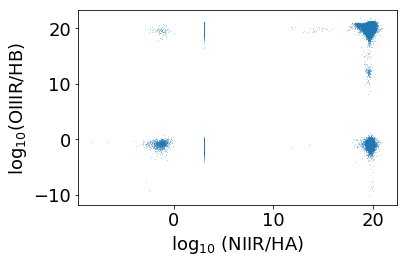

In [42]:
plt.plot(np.log10(NIIR_/F_Ha)[select_good],np.log10(OIIIR_/F_Hb)[select_good],',',alpha=0.3)
#plt.xlim(18,20.5)
#plt.ylim(17.5,22)

#plt.ylim(-2,1.3)
#plt.xlim(-2.,1.)

plt.xlabel('log$_{10}$ (NIIR/HA)')
plt.ylabel('log$_{10}$(OIIIR/HB)')
plt.tight_layout()
#plt.savefig('../plots/20/weird_BPT_top_right.png')
plt.show()

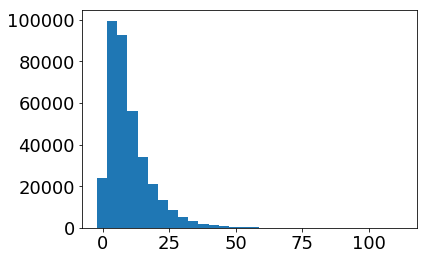

In [138]:
plt.hist(Gauss.getCol('SN'),bins=30,range=(-2.2,112.2))
plt.show()

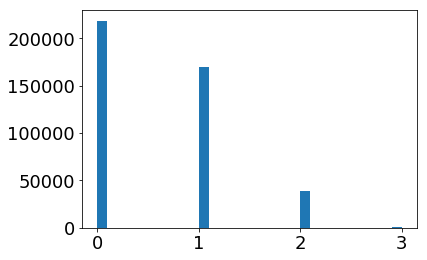

In [139]:
plt.hist(Gauss.getCol('HB_NPEG'),bins=30)#,range=(-2.2,112.2))
plt.show()

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


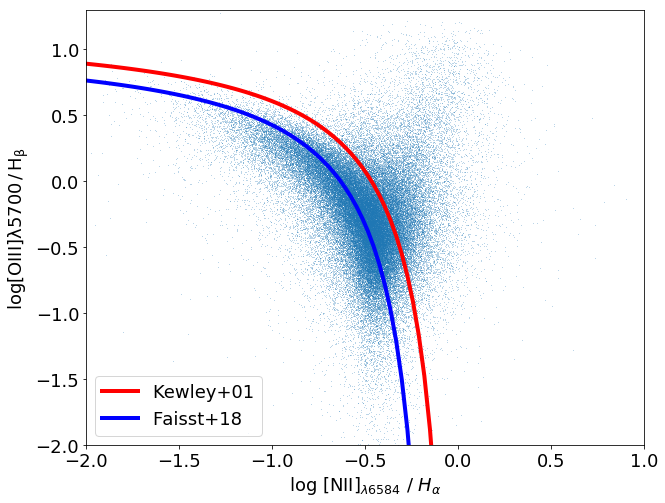

In [36]:
matplotlib.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,8))

select_good_NII = np.where((SN>4)&(NQ>2)&(IS_BEST==1)&(SURVEY=='GAMA')&(NIIR_NPEG==0)&(NIIR_>0)&(OIIIR_>0))
plt.plot(np.log10(NIIR/F_Ha)[select_good_NII],np.log10(OIIIR/F_Hb)[select_good_NII],',',alpha=0.3)
plt.ylim(-2.,1.3)
plt.xlim(-2.,1.)

x = np.linspace(-2,1,100)
#Faisst+18
redshift =0.3
y_0 = (0.61/(x + 0.138 - 0.042*(1+redshift)**2))+1.08
root = -(+ 0.138 - 0.042*(1+redshift)**2)
#equations 5,6,7 of Kewley et al. 2001a (pag 137)
y_1 = 0.61/(x - 0.047)+1.19 # x = log([NII]/Ha)
y_2 = 0.72/(x - 0.32)+1.30 # x = log([SII]6717,31/Ha)
y_3 = 0.73/(x + 0.59)+1.33 # x = log([OI]6300/Ha)

plt.plot(x[x<0.047],y_1[x<0.047],lw=4,label=r'Kewley+01',c='r')
plt.plot(x[x<root],y_0[x<root],lw=4,label=r'Faisst+18',c='b')


plt.ylabel(r'$\log \rm{[OIII]}\lambda 5700 \, / \, H_{\beta}$')
plt.xlabel(r'log [NII]$_{\lambda6584}$ / $H_{\alpha}$')

plt.legend()
plt.savefig('../plots/20/NII_GAMA_BPT_Faisst_Kewley.png')
plt.show()

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.


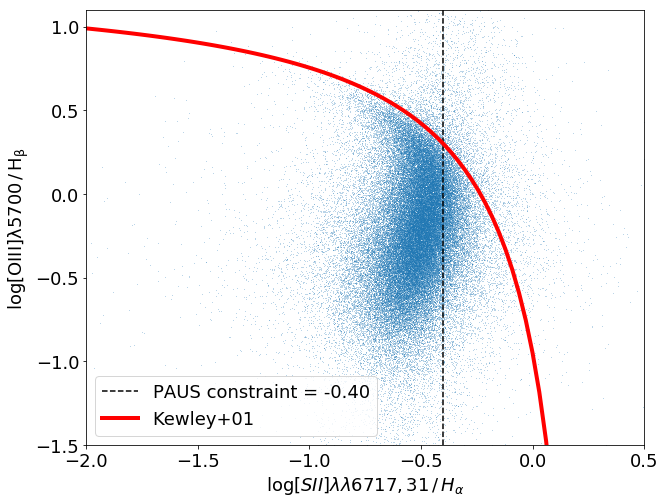

In [300]:
matplotlib.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,8))

x = np.linspace(-2,1,100)
y_2 = 0.72/(x - 0.32)+1.30 # x = log([SII]6717,31/Ha)



select_good_SII = np.where((SN>4)&(NQ>2)&(IS_BEST==1)&(SURVEY=='GAMA')&(NIIR_NPEG==0)&(SIIR_>0)&(OIIIR_>0))
plt.plot(np.log10(SII_tot/F_Ha)[select_good_SII],np.log10(OIIIR/F_Hb)[select_good_SII],',',alpha=0.3)
plt.ylim(-1.5,1.1)
plt.xlim(-2.,0.5)
plt.ylabel(r'$\log \rm{[OIII]}\lambda 5700 \, / \, H_{\beta}$')
plt.xlabel(r'$\log [SII]\lambda\lambda 6717,31 \, / \, H_{\alpha}$')

plt.axvline(-0.40,c='k',ls='dashed',label='PAUS constraint = -0.40')

plt.plot(x[x<0.32],y_2[x<0.32],lw=4,label=r'Kewley+01',c='r')
plt.legend(loc=3)
plt.savefig('../plots/20/SII_GAMA_BPT_Kewley_.png')
plt.show()

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


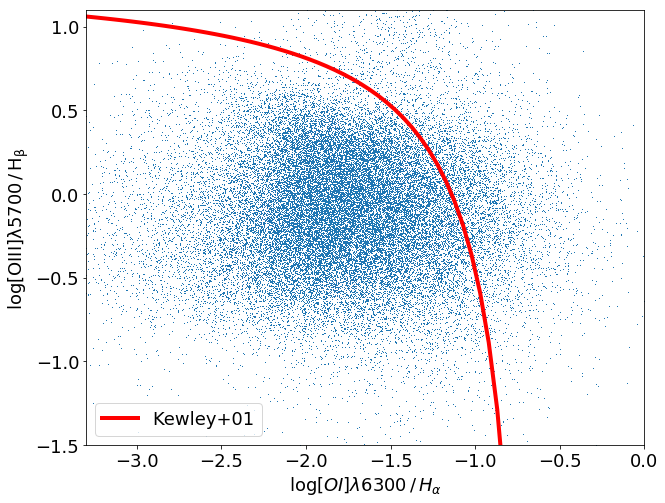

In [271]:
matplotlib.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,8))

select_good_OI = np.where((SN>3)&(NQ>2)&(IS_BEST==1)&((SURVEY=='GAMA')|(SURVEY=='SDSS'))&(OIR_NPEG==0)&(OIR_>0)&(OIIIR_>0))
plt.plot(np.log10(OIR/F_Ha)[select_good_OI],np.log10(OIIIR/F_Hb)[select_good_OI],',',alpha=1)
plt.ylim(-1.5,1.1)
plt.xlim(-3.3,0.0)
plt.ylabel(r'$\log \rm{[OIII]}\lambda 5700 \, / \, H_{\beta}$')
plt.xlabel(r'$\log [OI]\lambda 6300 \, / \, H_{\alpha}$')

x = np.linspace(-4,1,100)
y_3 = 0.73/(x + 0.59)+1.33 # x = log([OI]6300/Ha)

plt.plot(x[x<-0.59],y_3[x<-0.59],lw=4,label=r'Kewley+01',c='r')
plt.legend()
#plt.savefig('../plots/20/OI_GAMA_BPT_Kewley.png')
plt.show()

# Invert $\frac{OIII}{H_{\beta}} vs \frac{SII}{H_{\alpha}}$ relation

In [354]:
def median_in_bins_err(x,y,x1,x2,nbins,p1=0.25,p2=0.75):
    medians_x = np.zeros(nbins)
    medians_y = np.zeros(nbins)
    err_y_low = np.zeros(nbins)
    err_y_high = np.zeros(nbins)
    array = np.array(x)
    array = np.array(y)
    width = (float(x2)-float(x1))/nbins
    for i in range(int(nbins)):
        x_low = x1 + i*width
        x_high = x1+ (i+1)*width
        #print x_low, x_high
        sel = np.where((x>x_low)&(x<x_high))
        temp_ord = np.copy(y[sel])
        temp_ord = np.sort(temp_ord)
        medians_y[i] = temp_ord[int(len(temp_ord)*0.50 + 0.5)]
        err_y_low[i]  = np.abs(temp_ord[int(len(temp_ord)*p1 + 0.5)]-medians_y[i])
        err_y_high[i]  = np.abs(temp_ord[int(len(temp_ord)*p2 + 0.5)]-medians_y[i])
        #err_y[i] = [err_y_low,err_y_high]
        medians_x[i] = np.median(x[sel])
    return np.array(medians_x),np.array(medians_y),err_y_low,err_y_high

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in log10
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater
  del sys.path[0]
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: Runtime

6.097566222464593 2.9531225133267984


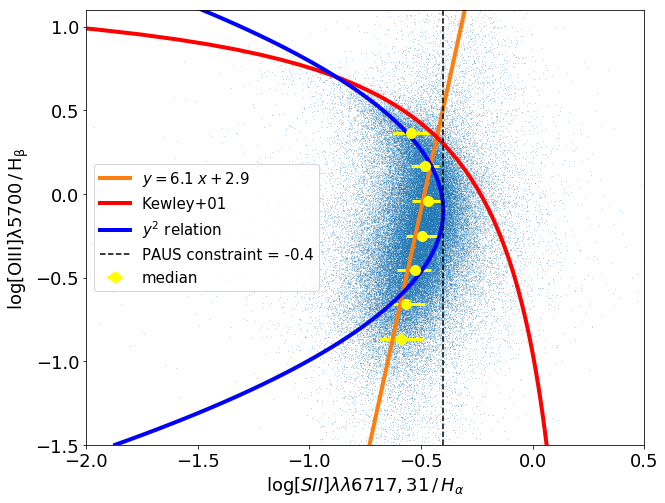

In [330]:
matplotlib.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,8))

x = np.linspace(-2,1,100)
y_2 = 0.72/(x - 0.32)+1.30 # x = log([SII]6717,31/Ha)

y_inv = np.linspace(-1.5,1.5,100)
x_inv = 0.32 + (0.72/(y_inv-1.30))
x_inv_mod = 0.2 + (0.72/(y_inv-1.3))

x_inv_2 = -0.75*(y_inv+0.1)**2-0.4

##################### here there was written uncorrectly NIIR_NPEG==0 and I am currently trying to include SDSS data
select_good_SII = np.where((SN>4)&(NQ>2)&(IS_BEST==1)&((SURVEY=='GAMA')|(SURVEY=='SDSS'))&(SIIR_NPEG==0)&(SIIR_>0)&(OIIIR_>0))

x_data = np.log10(SII_tot/F_Ha)[select_good_SII]
y_data = np.log10(OIIIR/F_Hb)[select_good_SII]

xx,yy,ey1,ey2 = median_in_bins_err(y_data,x_data,-1,0.5,7)
#plt.plot(yy,xx)


m,q = polyfit(yy,xx,1)
#m,q,r,p,std = linregress(x_data,y_data)
print m,q
plt.plot(x_data,y_data,',',alpha=0.3,zorder=0)
plt.plot(xx, m*xx+q,lw=4,label=r'$y = 6.1\; x + 2.9$')
plt.ylim(-1.5,1.1)
plt.xlim(-2.,0.5)
plt.ylabel(r'$\log \rm{[OIII]}\lambda 5700 \, / \, H_{\beta}$')
plt.xlabel(r'$\log [SII]\lambda\lambda 6717,31 \, / \, H_{\alpha}$')

plt.plot(x_inv,y_inv,lw = 4,c='r',label =r'Kewley+01')
plt.plot(x_inv_2,y_inv,lw = 4,c='b',label =r'$y^2$ relation')

plt.axvline(-0.40,c='k',ls='dashed',label='PAUS constraint = -0.4')

plt.errorbar(yy,xx,xerr=[ey1,ey2],fmt=".",markersize=20,elinewidth=3,color='yellow',label ='median')

#plt.plot(x[x<0.32],y_2[x<0.32],lw=4,label=r'Kewley+01',c='r')
plt.legend(loc=6,fontsize='small')
plt.savefig('../plots/20/SII_GAMA_BPT_Kewley_some_ideas.png')
plt.show()

# For Paus Telecon

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in log10
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater
  del sys.path[0]
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: Runtime

6.0975056686011495 2.953088343006385


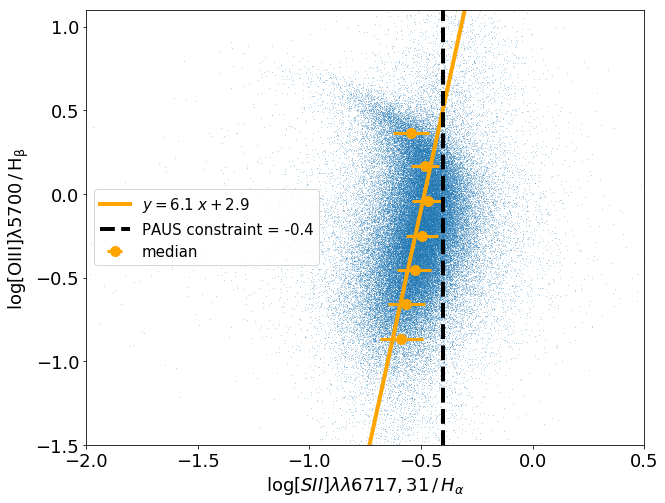

In [156]:
matplotlib.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,8))

x = np.linspace(-2,1,100)
y_2 = 0.72/(x - 0.32)+1.30 # x = log([SII]6717,31/Ha)

y_inv = np.linspace(-1.5,1.5,100)
x_inv = 0.32 + (0.72/(y_inv-1.30))
x_inv_mod = 0.2 + (0.72/(y_inv-1.3))

x_inv_2 = -0.75*(y_inv+0.1)**2-0.4

##################### here there was written uncorrectly NIIR_NPEG==0 and I am currently trying to include SDSS data
select_good_SII = np.where((SN>4)&(NQ>2)&(IS_BEST==1)&((SURVEY=='GAMA')|(SURVEY=='SDSS'))&(SIIR_NPEG==0)&(SIIR_>0)&(OIIIR_>0))

x_data = np.log10(SII_tot/F_Ha)[select_good_SII]
y_data = np.log10(OIIIR/F_Hb)[select_good_SII]

xx,yy,ey1,ey2 = median_in_bins_err(y_data,x_data,-1,0.5,7)
#plt.plot(yy,xx)


m,q = polyfit(yy,xx,1)
#m,q,r,p,std = linregress(x_data,y_data)
print m,q
plt.plot(x_data,y_data,',',alpha=0.3,zorder=0)
plt.plot(xx, m*xx+q,lw=4,label=r'$y = 6.1\; x + 2.9$',color='orange')
plt.ylim(-1.5,1.1)
plt.xlim(-2.,0.5)
plt.ylabel(r'$\log \rm{[OIII]}\lambda 5700 \, / \, H_{\beta}$')
plt.xlabel(r'$\log [SII]\lambda\lambda 6717,31 \, / \, H_{\alpha}$')

#plt.plot(x_inv,y_inv,lw = 4,c='r',label =r'Kewley+01')
#plt.plot(x_inv_2,y_inv,lw = 2,c='b',label =r'$y^2$ relation',ls='dotted')

plt.axvline(-0.40,c='k',ls='dashed',label='PAUS constraint = -0.4',lw=4)

plt.errorbar(yy,xx,xerr=[ey1,ey2],fmt=".",markersize=20,elinewidth=3,color='orange',label ='median')

#plt.plot(x[x<0.32],y_2[x<0.32],lw=4,label=r'Kewley+01',c='r')
plt.legend(loc=6,fontsize='small')
plt.savefig('../plots/20/SII_GAMA_BPT_Kewley_potential_lines.png')
plt.show()

# Relation in Jarle Brinchmann 2008 for star-forming galaxies

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


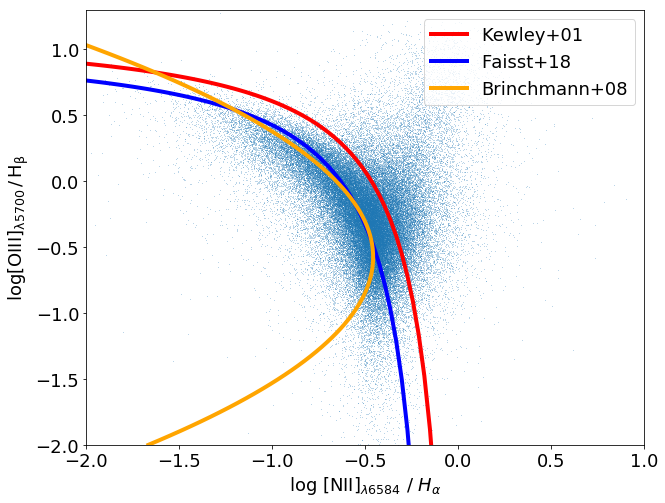

In [70]:
matplotlib.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,8))

select_good_NII = np.where((SN>4)&(NQ>2)&(IS_BEST==1)&(SURVEY=='GAMA')&(NIIR_NPEG==0)&(NIIR_>0)&(OIIIR_>0))
plt.plot(np.log10(NIIR/F_Ha)[select_good_NII],np.log10(OIIIR/F_Hb)[select_good_NII],',',alpha=0.3)
plt.ylim(-2.,1.3)
plt.xlim(-2.,1.)

x = np.linspace(-2,1,100)
#Faisst+18
redshift =0.3
y_0 = (0.61/(x + 0.138 - 0.042*(1+redshift)**2))+1.08
root = -(+ 0.138 - 0.042*(1+redshift)**2)
#equations 5,6,7 of Kewley et al. 2001a (pag 137)
y_1 = 0.61/(x - 0.047)+1.19 # x = log([NII]/Ha)
y_2 = 0.72/(x - 0.32)+1.30 # x = log([SII]6717,31/Ha)
y_3 = 0.73/(x + 0.59)+1.33 # x = log([OI]6300/Ha)

y_inv_brinch = np.linspace(-2,1.5,100)
x_inv_brinch = -0.596*y_inv_brinch**2 -0.687*y_inv_brinch -0.655

plt.plot(x[x<0.047],y_1[x<0.047],lw=4,label=r'Kewley+01',c='r')
plt.plot(x[x<root],y_0[x<root],lw=4,label=r'Faisst+18',c='b')
plt.plot(x_inv_brinch,y_inv_brinch,lw=4,label=r'Brinchmann+08',c='orange')

plt.ylabel(r'$\log \rm{[OIII]}_{\lambda 5700} \, / \, H_{\beta}$')
plt.xlabel(r'log [NII]$_{\lambda6584}$ / $H_{\alpha}$')

plt.legend(loc=1)
#plt.savefig('../plots/20/NII_GAMA_BPT_Faisst_Kewley_Brinchmann.png')
plt.show()

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in log10


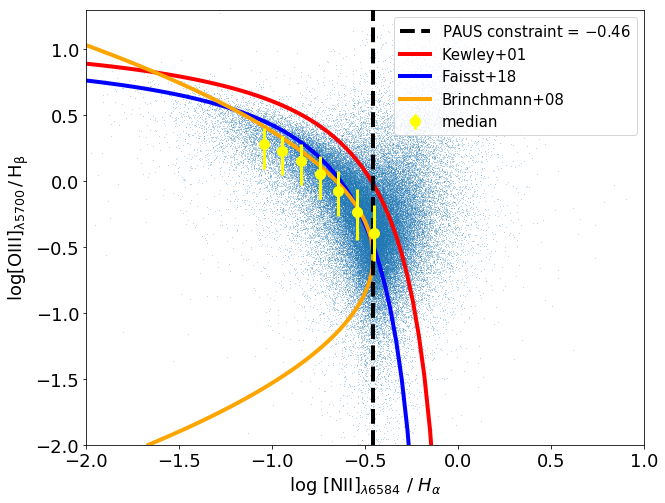

In [50]:
matplotlib.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,8))

########

selection = np.where((niiha>-3)&(oiiihb>-3))
xx,yy,ey1,ey2 = median_in_bins_err(niiha[selection],oiiihb[selection],-1.1,-0.4,7)
#plt.plot(yy,xx)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=20,elinewidth=3,color='yellow',label ='median',zorder=5)


##########

plt.axvline(-0.46,c='k',ls='dashed',lw=4,label=r'PAUS constraint = $-0.46$',zorder=4)


select_good_NII = np.where((SN>4)&(NQ>2)&(IS_BEST==1)&(SURVEY=='GAMA')&(NIIR_NPEG==0)&(NIIR_>0)&(OIIIR_>0))
plt.plot(np.log10(NIIR/F_Ha)[select_good_NII],np.log10(OIIIR/F_Hb)[select_good_NII],',',alpha=0.3)
plt.ylim(-2.,1.3)
plt.xlim(-2.,1.)

x = np.linspace(-2,1,100)
#Faisst+18
redshift =0.3
y_0 = (0.61/(x + 0.138 - 0.042*(1+redshift)**2))+1.08
root = -(+ 0.138 - 0.042*(1+redshift)**2)
#equations 5,6,7 of Kewley et al. 2001a (pag 137)
y_1 = 0.61/(x - 0.047)+1.19 # x = log([NII]/Ha)
y_2 = 0.72/(x - 0.32)+1.30 # x = log([SII]6717,31/Ha)
y_3 = 0.73/(x + 0.59)+1.33 # x = log([OI]6300/Ha)

y_inv_brinch = np.linspace(-2,1.5,100)
x_inv_brinch = -0.596*y_inv_brinch**2 -0.687*y_inv_brinch -0.655

plt.plot(x[x<0.047],y_1[x<0.047],lw=4,label=r'Kewley+01',c='r')
plt.plot(x[x<root],y_0[x<root],lw=4,label=r'Faisst+18',c='b')
plt.plot(x_inv_brinch,y_inv_brinch,lw=4,label=r'Brinchmann+08',c='orange')

plt.ylabel(r'$\log \rm{[OIII]}_{\lambda 5700} \, / \, H_{\beta}$')
plt.xlabel(r'log [NII]$_{\lambda6584}$ / $H_{\alpha}$')

plt.legend(loc=1,fontsize='small')
plt.savefig('../plots/20/NII_GAMA_BPT_Faisst_Kewley_Brinchmann_empirical.png')
plt.show()

In [303]:
selection = np.where((niiha>-3)&(oiiihb>-3))
xx,yy,ey1,ey2 = median_in_bins_err(niiha[selection],oiiihb[selection],-1.1,-0.4,7)
#plt.plot(yy,xx)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=20,elinewidth=3,color='orange',label ='median')


# $\frac{OIII}{H_{\beta}} vs \frac{OII}{H_{\beta}}$ as suggested by Madusha (Lamareille et al. 2010)

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in log10
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater
  del sys.path[0]
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: Runtime

1.1117759910062506 -0.5582752359675879


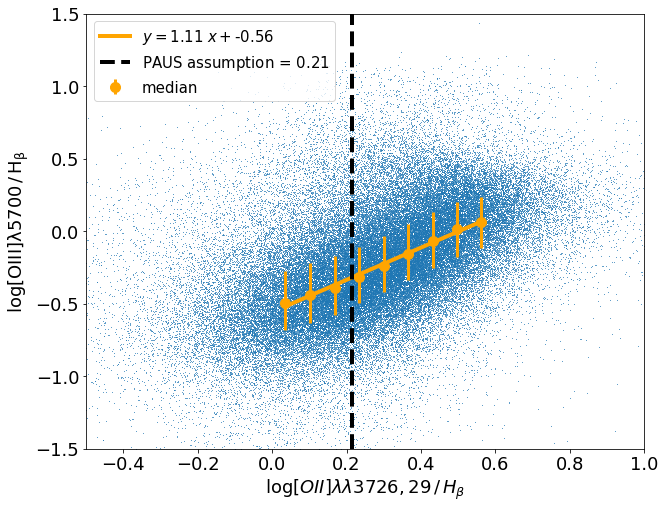

In [56]:
matplotlib.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,8))

x = np.linspace(-2,1,100)
y_2 = 0.72/(x - 0.32)+1.30 # x = log([SII]6717,31/Ha)

y_inv = np.linspace(-1.5,1.5,100)
x_inv = 0.32 + (0.72/(y_inv-1.30))
x_inv_mod = 0.2 + (0.72/(y_inv-1.3))

x_inv_2 = -0.75*(y_inv+0.1)**2-0.4

##################### here there was written uncorrectly NIIR_NPEG==0 and I am currently trying to include SDSS data
select_good_SII = np.where((SN>4)&(NQ>2)&(IS_BEST==1)&((SURVEY=='GAMA')|(SURVEY=='SDSS'))&(OIIR_NPEG==0)&(OII_tot>0)&(OIIIR_>0))

x_data = np.log10(OII_tot/F_Hb)[select_good_SII]
y_data = np.log10(OIIIR/F_Hb)[select_good_SII]

xx,yy,ey1,ey2 = median_in_bins_err(x_data,y_data,0.,0.6,9)
#plt.plot(yy,xx)


m,q = polyfit(xx,yy,1)
#m,q,r,p,std = linregress(x_data,y_data)
print m,q
plt.plot(x_data,y_data,',',alpha=0.7,zorder=0)
plt.plot(xx, m*xx+q,lw=4,label=r'$y =$'+str(round(m,2))+r'$\; x +$'+str(round(q,2)),color='orange')
plt.ylim(-1.5,1.5)
plt.xlim(-0.5,1.)
plt.ylabel(r'$\log \rm{[OIII]}\lambda 5700 \, / \, H_{\beta}$')
plt.xlabel(r'$\log [OII]\lambda\lambda 3726,29 \, / \, H_{\beta}$')


#plt.plot(x_inv_2,y_inv,lw = 2,c='b',label =r'$y^2$ relation',ls='dotted')

PAUS_RATIO = np.log10(1./0.61) 
plt.axvline(PAUS_RATIO,c='k',ls='dashed',label=r'PAUS assumption = $'+str(round(PAUS_RATIO,2))+'$',lw=4)

plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=20,elinewidth=3,color='orange',label ='median')

#plt.plot(x[x<0.32],y_2[x<0.32],lw=4,label=r'Kewley+01',c='r')
plt.legend(loc=2,fontsize='small')
plt.savefig('../plots/20/OII_Hb_OIII_Hb_GAMA_BPT_fit_straight.png')
plt.show()

# $\frac{NII}{H_{\alpha}} vs \frac{SII}{H_{\alpha}}$ ==> It doesn't say a lot because it is preatty flat

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in log10
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater
  del sys.path[0]
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: Runtime

-0.0315841279415146 -0.5155655901115482


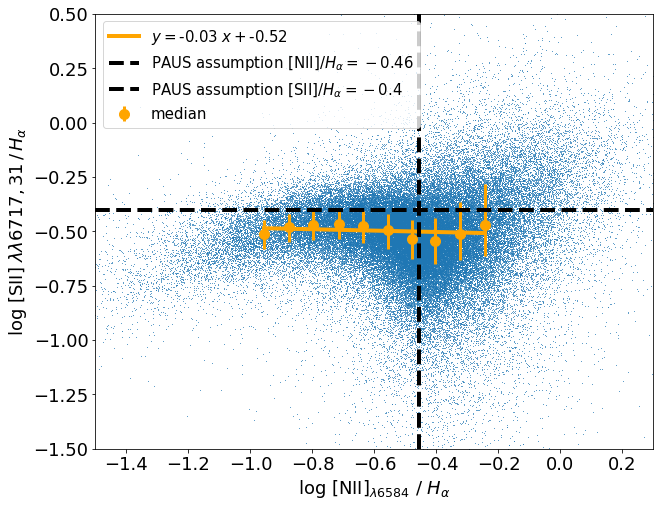

In [55]:
matplotlib.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,8))

x = np.linspace(-2,1,100)
y_2 = 0.72/(x - 0.32)+1.30 # x = log([SII]6717,31/Ha)

y_inv = np.linspace(-1.5,1.5,100)
x_inv = 0.32 + (0.72/(y_inv-1.30))
x_inv_mod = 0.2 + (0.72/(y_inv-1.3))

x_inv_2 = -0.75*(y_inv+0.1)**2-0.4

##################### here there was written uncorrectly NIIR_NPEG==0 and I am currently trying to include SDSS data
select_good_SII = np.where((SN>4)&(NQ>2)&(IS_BEST==1)&((SURVEY=='GAMA')|(SURVEY=='SDSS'))&(NIIR_NPEG==0)&(NIIR>0)&(SII_tot>0)&(SIIR_NPEG==0))

x_data = np.log10(NIIR/F_Ha)[select_good_NII]
y_data = np.log10(SII_tot/F_Ha)[select_good_NII]

xx,yy,ey1,ey2 = median_in_bins_err(x_data,y_data,-1.,-0.2,10)
#plt.plot(yy,xx)


m,q = polyfit(xx,yy,1)
#m,q,r,p,std = linregress(x_data,y_data)
print m,q
plt.plot(x_data,y_data,',',alpha=0.7,zorder=0)
plt.plot(xx, m*xx+q,lw=4,label=r'$y =$'+str(round(m,2))+r'$\; x +$'+str(round(q,2)),color='orange')
plt.ylim(-1.5,0.5)
plt.xlim(-1.5,0.3)

plt.xlabel(r'log [NII]$_{\lambda6584}$ / $H_{\alpha}$')
plt.ylabel(r'log [SII]$\;\lambda\lambda 6717,31 \, / \, H_{\alpha}$')

#plt.plot(x_inv_2,y_inv,lw = 2,c='b',label =r'$y^2$ relation',ls='dotted')
PAUS_RATIO_x = np.log10(0.62/1.77)
PAUS_RATIO_y = np.log10(0.7/1.77)

plt.axvline(PAUS_RATIO_x,c='k',ls='dashed',label=r'PAUS assumption [NII]$/H_{\alpha}= '+str(round(PAUS_RATIO_x,2))+'$',lw=4)
plt.axhline(PAUS_RATIO_y,c='k',ls='dashed',label=r'PAUS assumption [SII]$/H_{\alpha}= '+str(round(PAUS_RATIO_y,2))+'$',lw=4)


plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=20,elinewidth=3,color='orange',label ='median')

#plt.plot(x[x<0.32],y_2[x<0.32],lw=4,label=r'Kewley+01',c='r')
plt.legend(loc=2,fontsize='small')
plt.savefig('../plots/20/NII_Ha_SII_Ha_GAMA_BPT_fit_straight.png')
plt.show()

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-pac

-0.9476313092866769 -0.2087647336062094


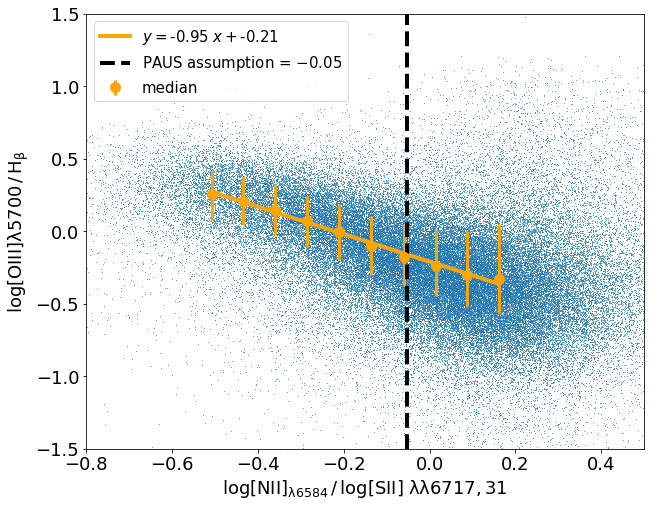

In [54]:
matplotlib.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,8))

x = np.linspace(-2,1,100)
y_2 = 0.72/(x - 0.32)+1.30 # x = log([SII]6717,31/Ha)

y_inv = np.linspace(-1.5,1.5,100)
x_inv = 0.32 + (0.72/(y_inv-1.30))
x_inv_mod = 0.2 + (0.72/(y_inv-1.3))

x_inv_2 = -0.75*(y_inv+0.1)**2-0.4

##################### here there was written uncorrectly NIIR_NPEG==0 and I am currently trying to include SDSS data
select_good_SII = np.where((SN>4)&(NQ>2)&(IS_BEST==1)&((SURVEY=='GAMA')|(SURVEY=='SDSS'))&(NIIR_NPEG==0)&(NIIR>0)&(SII_tot>0)&(SIIR_NPEG==0))

x_data = np.log10(NIIR/SII_tot)[select_good_NII]
y_data = np.log10(OIIIR/F_Hb)[select_good_NII]

xx,yy,ey1,ey2 = median_in_bins_err(x_data,y_data,-0.55,0.2,10)
#plt.plot(yy,xx)


m,q = polyfit(xx,yy,1)
#m,q,r,p,std = linregress(x_data,y_data)
print m,q
plt.plot(x_data,y_data,',',alpha=0.7,zorder=0)
plt.plot(xx, m*xx+q,lw=4,label=r'$y =$'+str(round(m,2))+r'$\; x +$'+str(round(q,2)),color='orange')
plt.ylim(-1.5,1.5)
plt.xlim(-0.8,0.5)
plt.xlabel(r'$\log \rm{[NII]}_{\lambda6584} \, / \, \rm{log [SII]} \; \lambda\lambda 6717,31 $')
plt.ylabel(r'$\log \rm{[OIII]}\lambda 5700 \, / \, H_{\beta}$')


#plt.plot(x_inv_2,y_inv,lw = 2,c='b',label =r'$y^2$ relation',ls='dotted')

PAUS_RATIO = np.log10(0.62/0.7) 
plt.axvline(PAUS_RATIO,c='k',ls='dashed',label=r'PAUS assumption = $'+str(round(PAUS_RATIO,2))+'$',lw=4)

plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=20,elinewidth=3,color='orange',label ='median')

#plt.plot(x[x<0.32],y_2[x<0.32],lw=4,label=r'Kewley+01',c='r')
plt.legend(loc=2,fontsize='small')
plt.savefig('../plots/20/NII_SII_OIII_Hb_GAMA_BPT_fit_straight.png')
plt.show()

# Plot the last three figs in different z bins

(array([18892., 14955., 11518., 10885.,  9246.,  9978.,  7808.,  6855.,
         5640.,  3774.,  2950.,  2285.,  1770.,  1422.,  1090.,   961.,
          820.,   582.,   593.,   508.,   421.,   436.,   334.,   297.,
          363.,   322.,   280.,   329.,   294.,   279.]),
 array([0.35000116, 0.38333112, 0.41666108, 0.44999105, 0.483321  ,
        0.516651  , 0.54998094, 0.5833109 , 0.61664087, 0.6499708 ,
        0.6833008 , 0.71663076, 0.7499607 , 0.7832907 , 0.81662065,
        0.84995055, 0.8832805 , 0.9166105 , 0.94994044, 0.9832704 ,
        1.0166004 , 1.0499303 , 1.0832603 , 1.1165903 , 1.1499202 ,
        1.1832502 , 1.2165802 , 1.2499101 , 1.2832401 , 1.31657   ,
        1.3499    ], dtype=float32),
 <a list of 1 Patch objects>)

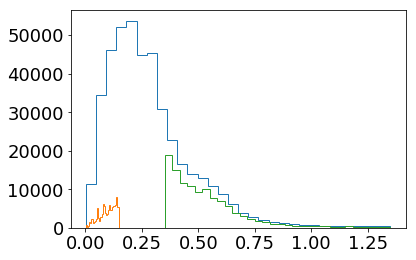

In [63]:
zt1 = 0.15
zt2 = 0.35
sel_z1 = np.where(Z<zt1)
sel_z2 = np.where(Z>zt2)

plt.hist(Z,bins=30,histtype='step')
plt.hist(Z[select_good_OII and sel_z1],bins=30,histtype='step')
plt.hist(Z[select_good_OII and sel_z2],bins=30,histtype='step')

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in log10
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in log10
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater
  del sys.path[0]
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less
  del sys.pat

1.0762205678037156 -0.42749634782291407
0.7869053772897037 -0.32990547838217515


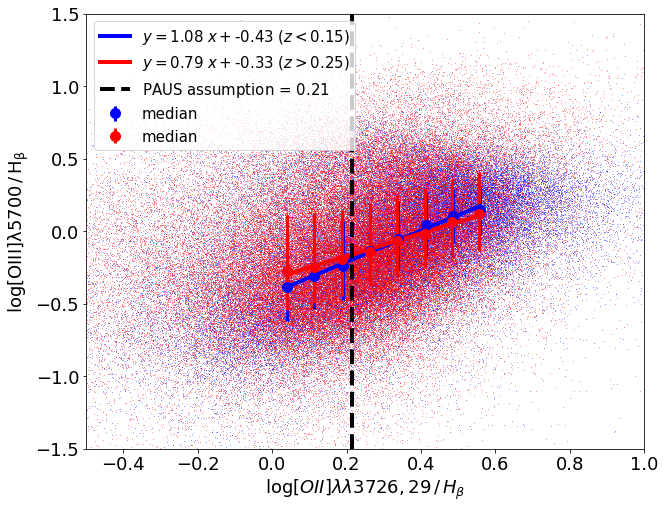

In [192]:
matplotlib.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,8))

zt1 = 0.15
zt2 = 0.25
sel_z1 = np.where(Z<zt1)
sel_z2 = np.where(Z>zt2)


x = np.linspace(-2,1,100)
y_2 = 0.72/(x - 0.32)+1.30 # x = log([SII]6717,31/Ha)

y_inv = np.linspace(-1.5,1.5,100)
x_inv = 0.32 + (0.72/(y_inv-1.30))
x_inv_mod = 0.2 + (0.72/(y_inv-1.3))

x_inv_2 = -0.75*(y_inv+0.1)**2-0.4

##################### here there was written uncorrectly NIIR_NPEG==0 and I am currently trying to include SDSS data
select_good_OII = np.where((SN>4)&(NQ>2)&(IS_BEST==1)&((SURVEY=='GAMA')|(SURVEY=='SDSS'))&(OIIR_NPEG==0)&(OII_tot>0)&(OIIIR_>0))

x_data_1 = np.log10(OII_tot/F_Hb)[select_good_OII and sel_z1]
y_data_1 = np.log10(OIIIR/F_Hb)[select_good_OII and sel_z1]

xx,yy,ey1,ey2 = median_in_bins_err(x_data_1,y_data_1,0.,0.6,8)
m_1,q_1 = polyfit(xx,yy,1)
print m_1,q_1
plt.plot(x_data_1,y_data_1,',',alpha=0.4,zorder=0,c='blue')
plt.plot(xx, m_1*xx+q_1,lw=4,label=r'$y =$'+str(round(m_1,2))+r'$\; x +$'+str(round(q_1,2))+r' ($z<$'+str(round(zt1,2))+')',color='blue')
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=20,elinewidth=3,color='blue',label ='median')


x_data_2 = np.log10(OII_tot/F_Hb)[select_good_OII and sel_z2]
y_data_2 = np.log10(OIIIR/F_Hb)[select_good_OII and sel_z2]


xxx,yyy,eey1,eey2 = median_in_bins_err(x_data_2,y_data_2,0.,0.6,8)
m_2,q_2 = polyfit(xxx,yyy,1)
print m_2,q_2
plt.plot(x_data_2,y_data_2,',',alpha=0.4,zorder=0,c='red')
plt.plot(xx, m_2*xx+q_2,lw=4,label=r'$y =$'+str(round(m_2,2))+r'$\; x +$'+str(round(q_2,2))+r' ($z>$'+str(round(zt2,2))+')',color='red')
plt.errorbar(xxx,yyy,yerr=[eey1,eey2],fmt=".",markersize=20,elinewidth=3,color='red',label ='median')


plt.ylim(-1.5,1.5)
plt.xlim(-0.5,1.)
plt.ylabel(r'$\log \rm{[OIII]}\lambda 5700 \, / \, H_{\beta}$')
plt.xlabel(r'$\log [OII]\lambda\lambda 3726,29 \, / \, H_{\beta}$')


#plt.plot(x_inv_2,y_inv,lw = 2,c='b',label =r'$y^2$ relation',ls='dotted')

PAUS_RATIO = np.log10(1./0.61) 
plt.axvline(PAUS_RATIO,c='k',ls='dashed',label=r'PAUS assumption = $'+str(round(PAUS_RATIO,2))+'$',lw=4)


#plt.plot(x[x<0.32],y_2[x<0.32],lw=4,label=r'Kewley+01',c='r')
plt.legend(loc=2,fontsize='small')
#plt.savefig('../plots/20/OII_Hb_OIII_Hb_GAMA_BPT_fit_straight_redshift.png')
plt.show()

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in divide
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in divide
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in log10
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in log10
/Users/giorgiomanzoni/pngs_an

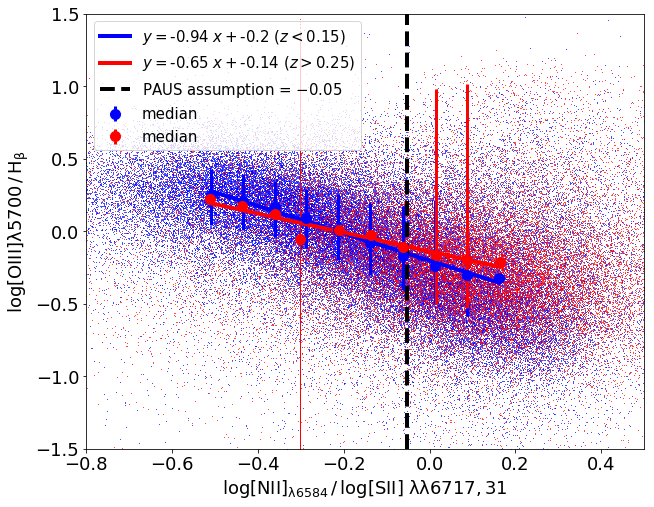

In [189]:
matplotlib.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,8))


zt1 = 0.15
zt2 = 0.25
sel_z1 = np.where(Z<zt1)
sel_z2 = np.where(Z>zt2)




x = np.linspace(-2,1,100)
y_2 = 0.72/(x - 0.32)+1.30 # x = log([SII]6717,31/Ha)

y_inv = np.linspace(-1.5,1.5,100)
x_inv = 0.32 + (0.72/(y_inv-1.30))
x_inv_mod = 0.2 + (0.72/(y_inv-1.3))

x_inv_2 = -0.75*(y_inv+0.1)**2-0.4

##################### here there was written uncorrectly NIIR_NPEG==0 and I am currently trying to include SDSS data
select_good_SII = np.where((SN>4)&(NQ>2)&(IS_BEST==1)&((SURVEY=='GAMA')|(SURVEY=='SDSS'))&(NIIR_NPEG==0)&(NIIR>0)&(SII_tot>0)&(SIIR_NPEG==0))

x_data_1 = np.log10(NIIR/SII_tot)[select_good_NII and sel_z1]
y_data_1 = np.log10(OIIIR/F_Hb)[select_good_NII and sel_z1]
xx,yy,ey1,ey2 = median_in_bins_err(x_data_1,y_data_1,-0.55,0.2,10)
m_1,q_1 = polyfit(xx,yy,1)
plt.plot(x_data_1,y_data_1,',',alpha=0.7,zorder=0,c='blue')
plt.plot(xx, m_1*xx+q_1,lw=4,label=r'$y =$'+str(round(m_1,2))+r'$\; x +$'+str(round(q_1,2))+r' ($z<$'+str(round(zt1,2))+')',color='blue')
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=20,elinewidth=3,color='blue',label ='median')


x_data_2 = np.log10(NIIR/SII_tot)[select_good_NII and sel_z2]
y_data_2 = np.log10(OIIIR/F_Hb)[select_good_NII and sel_z2]
xxx,yyy,eey1,eey2 = median_in_bins_err(x_data_2,y_data_2,-0.55,0.2,10)
m_2,q_2 = polyfit(xxx,yyy,1)
plt.plot(x_data_2,y_data_2,',',alpha=0.7,zorder=0,c='red')
plt.plot(xxx, m_2*xxx+q_2,lw=4,label=r'$y =$'+str(round(m_2,2))+r'$\; x +$'+str(round(q_2,2))+r' ($z>$'+str(round(zt2,2))+')',color='red')
plt.errorbar(xxx,yyy,yerr=[eey1,eey2],fmt=".",markersize=20,elinewidth=3,color='red',label ='median')


plt.ylim(-1.5,1.5)
plt.xlim(-0.8,0.5)
plt.xlabel(r'$\log \rm{[NII]}_{\lambda6584} \, / \, \rm{log [SII]} \; \lambda\lambda 6717,31 $')
plt.ylabel(r'$\log \rm{[OIII]}\lambda 5700 \, / \, H_{\beta}$')


#plt.plot(x_inv_2,y_inv,lw = 2,c='b',label =r'$y^2$ relation',ls='dotted')

PAUS_RATIO = np.log10(0.62/0.7) 
plt.axvline(PAUS_RATIO,c='k',ls='dashed',label=r'PAUS assumption = $'+str(round(PAUS_RATIO,2))+'$',lw=4)



#plt.plot(x[x<0.32],y_2[x<0.32],lw=4,label=r'Kewley+01',c='r')
plt.legend(loc=2,fontsize='small')
#plt.savefig('../plots/20/NII_SII_OIII_Hb_GAMA_BPT_fit_straight_redshift.png')
plt.show()

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in log10
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log10
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in log10
/Users/giorgiomanzoni/pngs_anac

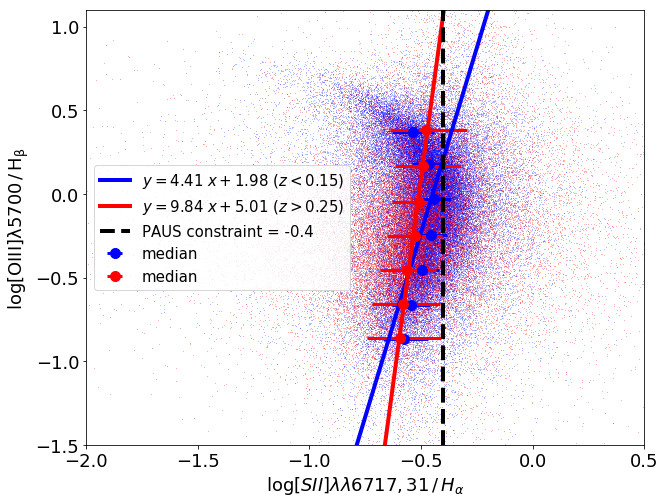

In [160]:
matplotlib.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,8))

x = np.linspace(-2,1,100)
y_2 = 0.72/(x - 0.32)+1.30 # x = log([SII]6717,31/Ha)

y_inv = np.linspace(-1.5,1.5,100)
x_inv = 0.32 + (0.72/(y_inv-1.30))
x_inv_mod = 0.2 + (0.72/(y_inv-1.3))

x_inv_2 = -0.75*(y_inv+0.1)**2-0.4

zt1 = 0.15
zt2 = 0.25
sel_z1 = np.where(Z<zt1)
sel_z2 = np.where(Z>zt2)


select_good_SII = np.where((SN>4)&(NQ>2)&(IS_BEST==1)&((SURVEY=='GAMA')|(SURVEY=='SDSS'))&(SIIR_NPEG==0)&(SII_tot>10**(-5))&(OIIIR_>10**(-5))&(np.isnan(np.log10(SII_tot/F_Ha)==False)))

x_data_1_ = np.log10(SII_tot/F_Ha)[select_good_SII and sel_z1]
y_data_1_ = np.log10(OIIIR/F_Hb)[select_good_SII and sel_z1]
x_data_1 = x_data_1_[np.where((x_data_1_>-5)&(y_data_1_>-5))]
y_data_1 = y_data_1_[np.where((x_data_1_>-5)&(y_data_1_>-5))]
yy,xx,ey1,ey2 = median_in_bins_err(y_data_1,x_data_1,-1,0.5,7)
m_1,q_1 = polyfit(xx,yy,1)
plt.plot(x_data_1,y_data_1,',',alpha=0.3,zorder=0,c='blue')
plt.plot(yy,m_1*yy+q_1,lw=4,label=r'$y =$'+str(round(m_1,2))+r'$\; x +$'+str(round(q_1,2))+r' ($z<$'+str(round(zt1,2))+')',color='blue')
plt.errorbar(xx,yy,xerr=[ey1,ey2],fmt=".",markersize=20,elinewidth=3,color='blue',label ='median')

x_data_2_ = np.log10(SII_tot/F_Ha)[select_good_SII and sel_z2]
y_data_2_ = np.log10(OIIIR/F_Hb)[select_good_SII and sel_z2]
x_data_2 = x_data_2_[np.where((x_data_2_>-5)&(y_data_2_>-5))]
y_data_2 = y_data_2_[np.where((x_data_2_>-5)&(y_data_2_>-5))]

yyy,xxx,eey1,eey2 = median_in_bins_err(y_data_2,x_data_2,-1,0.5,7)
m_2,q_2 = polyfit(xxx,yyy,1)
plt.plot(x_data_2,y_data_2,',',alpha=0.3,zorder=0,c='red')
plt.plot(yyy, m_2*yyy+q_2,lw=4,label=r'$y =$'+str(round(m_2,2))+r'$\; x +$'+str(round(q_2,2))+r' ($z>$'+str(round(zt2,2))+')',color='red')
plt.errorbar(xxx,yyy,xerr=[eey1,eey2],fmt=".",markersize=20,elinewidth=3,color='red',label ='median')




plt.ylim(-1.5,1.1)
plt.xlim(-2.,0.5)
plt.ylabel(r'$\log \rm{[OIII]}\lambda 5700 \, / \, H_{\beta}$')
plt.xlabel(r'$\log [SII]\lambda\lambda 6717,31 \, / \, H_{\alpha}$')

#plt.plot(x_inv,y_inv,lw = 4,c='r',label =r'Kewley+01')
#plt.plot(x_inv_2,y_inv,lw = 2,c='b',label =r'$y^2$ relation',ls='dotted')

plt.axvline(-0.40,c='k',ls='dashed',label='PAUS constraint = -0.4',lw=4)

#plt.plot(x[x<0.32],y_2[x<0.32],lw=4,label=r'Kewley+01',c='r')
plt.legend(loc=6,fontsize='small')
#plt.savefig('../plots/20/SII_GAMA_BPT_redshift.png')
plt.show()

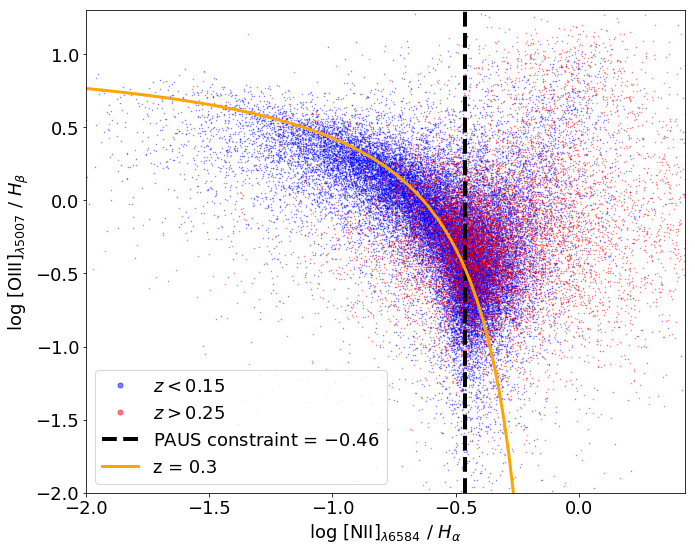

In [185]:
x1 = -2
x2 = 0.5

#zmean = z.mean()
zmean = 0.3


zt1 = 0.15
zt2 = 0.25
sel_z1 = np.where(z<zt1)
sel_z2 = np.where(z>zt2)


if x2>=-0.069:
    x2=-0.069 

x = np.linspace(x1,x2,100)
x_ = np.linspace(x1,-0.1,100)

#y = (0.61/(x + 0.069))+1.08 #z=0.284
y = (0.61/(x + 0.138 - 0.042*(1+zmean)**2))+1.08
ymax  = (0.61/(x + 0.138 - 0.042*(1+0.7)**2))+1.08
ymin  = (0.61/(x_ + 0.138 - 0.042*(1+0.)**2))+1.08

plt.figure(figsize=(10,8))


#plt.axvline(-0.069,ls='dashed',lw=10)


plt.plot(niiha[sel_z1],oiiihb[sel_z1],'.',markersize=1,alpha=0.5,c='b',label=r'$z<$'+str(zt1))
plt.plot(niiha[sel_z2],oiiihb[sel_z2],'.',markersize=1,alpha=0.5,c='r',label=r'$z>$'+str(zt2))


plt.axvline(-0.46,c='k',ls='dashed',label=r'PAUS constraint = $-0.46$',lw=4)
plt.plot(x,y,lw=3,label='z = 0.3',c='orange')

#plt.plot(x,ymax,lw=3,label='z max = 0.7')
#plt.plot(x,ymin,lw=3,label = 'z min = 0')

plt.xlabel(r'log [NII]$_{\lambda6584}$ / $H_{\alpha}$')
plt.ylabel(r'log [OIII]$_{\lambda5007}$ / $H_{\beta}$')
plt.xlim(x1,x2+0.5)
plt.ylim(-2,1.3)
#plt.title('GAMA sample')
plt.legend(markerscale=10)
plt.tight_layout()
plt.savefig('../plots/20/NII_BPT_redshift.png')
plt.show()

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in log10
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater
  del sys.path[0]
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: Runtime

6.0975056686011495 2.953088343006385


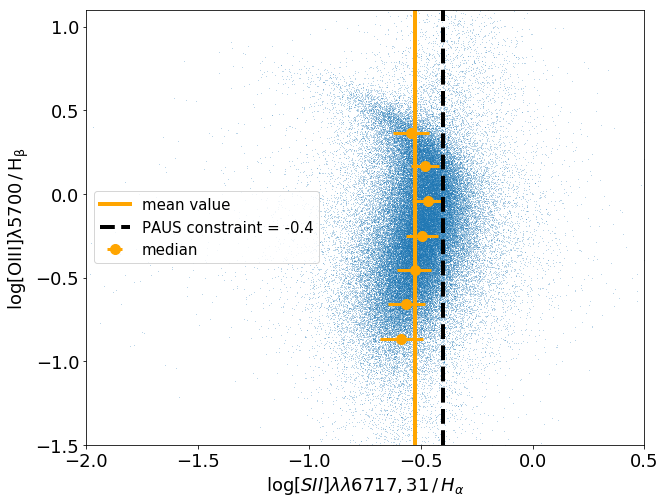

In [197]:
matplotlib.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,8))

x = np.linspace(-2,1,100)
y_2 = 0.72/(x - 0.32)+1.30 # x = log([SII]6717,31/Ha)

y_inv = np.linspace(-1.5,1.5,100)
x_inv = 0.32 + (0.72/(y_inv-1.30))
x_inv_mod = 0.2 + (0.72/(y_inv-1.3))

x_inv_2 = -0.75*(y_inv+0.1)**2-0.4

##################### here there was written uncorrectly NIIR_NPEG==0 and I am currently trying to include SDSS data
select_good_SII = np.where((SN>4)&(NQ>2)&(IS_BEST==1)&((SURVEY=='GAMA')|(SURVEY=='SDSS'))&(SIIR_NPEG==0)&(SIIR_>0)&(OIIIR_>0))

x_data = np.log10(SII_tot/F_Ha)[select_good_SII]
y_data = np.log10(OIIIR/F_Hb)[select_good_SII]

xx,yy,ey1,ey2 = median_in_bins_err(y_data,x_data,-1,0.5,7)
#plt.plot(yy,xx)

plt.axvline(np.average(yy),c='orange',ls='-',label='mean value',lw=4)



m,q = polyfit(yy,xx,1)
#m,q,r,p,std = linregress(x_data,y_data)
print m,q
plt.plot(x_data,y_data,',',alpha=0.3,zorder=0)
#plt.plot(xx, m*xx+q,lw=4,label=r'$y = 6.1\; x + 2.9$',color='orange')
plt.ylim(-1.5,1.1)
plt.xlim(-2.,0.5)
plt.ylabel(r'$\log \rm{[OIII]}\lambda 5700 \, / \, H_{\beta}$')
plt.xlabel(r'$\log [SII]\lambda\lambda 6717,31 \, / \, H_{\alpha}$')

#plt.plot(x_inv,y_inv,lw = 4,c='r',label =r'Kewley+01')
#plt.plot(x_inv_2,y_inv,lw = 2,c='b',label =r'$y^2$ relation',ls='dotted')

plt.axvline(-0.40,c='k',ls='dashed',label='PAUS constraint = -0.4',lw=4)

plt.errorbar(yy,xx,xerr=[ey1,ey2],fmt=".",markersize=20,elinewidth=3,color='orange',label ='median')

#plt.plot(x[x<0.32],y_2[x<0.32],lw=4,label=r'Kewley+01',c='r')
plt.legend(loc=6,fontsize='small')
plt.savefig('../plots/20/SII_GAMA_BPT_vertical.png')
plt.show()